# TMDb Movie Data Project
## Project Information
load file name `tmdb-movies.csv` This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue <br>
<ul>
<li>Certain columns, like ‘cast’and ‘genres’, contain multiplevalues separated by pipe (|) characters.<br>
<li>There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can
leave them as is.
<li>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,
accounting for inflation over time.
</ul>
<br>
<h2>Asking Questions</h2>
<ul>
    <li>Which genres are most popular from year to year? 
    <li>What kinds of properties are associated with movies that have high revenues?




<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [349]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [351]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [352]:
df[df['original_title'].duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1133,281778,tt3297792,0.188264,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,...,During their search for a habitable planet the...,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,7/22/14,23,4.9,2014,0.000000e+00,0.000000e+00
1194,296626,tt3534842,0.132764,0,0,Finders Keepers,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,NaN,Alexander Yellen,NaN,...,A haunted doll teaches one little girl why chi...,85,Mystery|Thriller|Horror,HFD Productions|Hybrid LLC,10/18/14,33,4.8,2014,0.000000e+00,0.000000e+00
1349,42222,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,NaN,Fred Zinnemann,"Through It All, Friendship Prevailed.",...,JULIA covers the 1930s when Lillian attained f...,117,Drama,Twentieth Century Fox Film Corporation,10/2/77,10,5.0,1977,0.000000e+00,0.000000e+00
1440,7445,tt0765010,1.223786,26000000,43318349,Brothers,Tobey Maguire|Jake Gyllenhaal|Natalie Portman|...,NaN,Jim Sheridan,There are two sides to every family.,...,When his helicopter goes down during his fourt...,104,Drama|Thriller|War,Lionsgate|Relativity Media|Sighvatsson Films|M...,1/27/09,381,6.7,2009,2.642641e+07,4.402879e+07
1513,62320,tt1014762,0.688361,0,0,Home,Glenn Close|Yann Arthus-Bertrand|Jacques Gambl...,http://www.homethemovie.org/,Yann Arthus-Bertrand,A Stunning Visual Portrayal of Earth,...,"With aerial footage from 54 countries, Home is...",95,Documentary,Europa Corp.|ElzÃ©vir Films|France 2 (FR2),6/3/09,109,7.8,2009,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,39995,tt0079482,0.047645,0,0,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,NaN,Colin Eggleston,Their crime was against nature. Nature found t...,...,When a suburban couple go camping for the week...,92,Horror|Thriller|Mystery,The Australian Film Commission|Victorian Film|...,10/14/78,17,6.1,1978,0.000000e+00,0.000000e+00
10827,2661,tt0060153,0.410366,1377800,0,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,NaN,Leslie H. Martinson,He's Here Big As Life In A Real Bat-Epic,...,The Dynamic Duo faces four super-villains who ...,105,Family|Adventure|Comedy|Science Fiction|Crime,Twentieth Century Fox Film Corporation|DC Comi...,7/30/66,99,5.9,1966,9.256081e+06,0.000000e+00
10849,28270,tt0060445,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,NaN,Ronald Neame,Shirley MacLaine raises Michael Caine!,...,Harry Dean (Michael Caine) has a perfect plan ...,109,Action|Comedy|Crime,Universal Pictures,12/16/66,14,6.1,1966,0.000000e+00,0.000000e+00
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,...,The film tells the story of a young man who le...,114,Comedy|Drama|Romance,NaN,3/29/66,26,6.2,1966,0.000000e+00,0.000000e+00


## Checking for duplicates data to determine wether it is important to drop or not.

In [353]:
df.query('original_title == "Batman"') #some movies of the same name were produced in different year which will indicate not necessary to drop duplicates

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9182,268,tt0096895,2.640852,35000000,411348924,Batman,Jack Nicholson|Michael Keaton|Kim Basinger|Mic...,NaN,Tim Burton,Have you ever danced with the devil in the pal...,...,The Dark Knight of Gotham City begins his war ...,126,Fantasy|Action,PolyGram Filmed Entertainment|The Guber-Peters...,6/23/89,1207,6.9,1989,6.156447e+07,7.235566e+08
10827,2661,tt0060153,0.410366,1377800,0,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,NaN,Leslie H. Martinson,He's Here Big As Life In A Real Bat-Epic,...,The Dynamic Duo faces four super-villains who ...,105,Family|Adventure|Comedy|Science Fiction|Crime,Twentieth Century Fox Film Corporation|DC Comi...,7/30/66,99,5.9,1966,9.256081e+06,0.000000e+00


In [354]:
sum(df['original_title'].duplicated()) # duplicates in data frame

295

In [355]:
df[df['tagline']=="The chase is on!"]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1170,273621,tt3461828,0.235468,0,0,Cat Run 2,Scott Mechlowicz|Alphonso McAuley|Winter Ave Z...,NaN,John Stockwell,The chase is on!,...,A couple of fumbling best friends run a privat...,97,Action,NaN,8/19/14,13,4.3,2014,0.0,0.0
10854,31602,tt0060232,0.146402,0,0,The Chase,Marlon Brando|Jane Fonda|Robert Redford|E.G. M...,NaN,Arthur Penn,The chase is on!,...,Most everyone in town thinks that Sheriff Cald...,135,Thriller|Drama|Crime,Horizon Pictures|Columbia Pictures Corporation,2/17/66,17,6.0,1966,0.0,0.0


In [356]:
df.budget_adj.head()

0    1.379999e+08
1    1.379999e+08
2    1.012000e+08
3    1.839999e+08
4    1.747999e+08
Name: budget_adj, dtype: float64

In [357]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [358]:
df.keywords.head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

In [359]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [360]:
df.revenue_adj.value_counts()

0.000000e+00    6016
5.766759e+07       2
9.670000e+05       2
2.633157e+07       2
1.000000e+06       2
                ... 
5.050618e+06       1
9.443926e+07       1
3.375312e+07       1
9.361494e+06       1
2.678633e+08       1
Name: revenue_adj, Length: 4840, dtype: int64

In [361]:
df[df['genres']=='Thriller|Science Fiction|Action|Crime']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4221,8831,tt0111438,0.710052,27000000,101646581,Timecop,Jean-Claude Van Damme|Mia Sara|Ron Silver|Bruc...,NaN,Peter Hyams,They killed his wife ten years ago. There's st...,...,An officer for a security agency that regulate...,99,Thriller|Science Fiction|Action|Crime,Universal Pictures|Renaissance Pictures|Dark H...,9/15/94,157,5.3,1994,3.972001e+07,1.495335e+08


In [362]:
df.genres.value_counts()

Comedy                                       712
Drama                                        712
Documentary                                  312
Drama|Romance                                289
Comedy|Drama                                 280
                                            ... 
Thriller|Action|Science Fiction|Crime          1
Fantasy|Action|Drama                           1
Animation|Comedy|Family|Western|Adventure      1
Animation|Family|Fantasy|Romance               1
Action|Family|Adventure|Romance|TV Movie       1
Name: genres, Length: 2039, dtype: int64

In [363]:
df.genres.str.contains('|').count()

10843

In [364]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [365]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Testing

In [366]:
#Looking for a way to improve data quality of presentation by converting value of runtime from minutes to duration datetime type.
timedeltaa= pd.to_timedelta(df['runtime'],unit='m', errors='ignore')
timedeltaa

0       0 days 02:04:00
1       0 days 02:00:00
2       0 days 01:59:00
3       0 days 02:16:00
4       0 days 02:17:00
              ...      
10861   0 days 01:35:00
10862   0 days 02:56:00
10863   0 days 01:34:00
10864   0 days 01:20:00
10865   0 days 01:14:00
Name: runtime, Length: 10866, dtype: timedelta64[ns]

In [367]:
timedeltaa = timedeltaa.astype(str).str[8:]
timedeltaa

0        2:04:00
1        2:00:00
2        1:59:00
3        2:16:00
4        2:17:00
          ...   
10861    1:35:00
10862    2:56:00
10863    1:34:00
10864    1:20:00
10865    1:14:00
Name: runtime, Length: 10866, dtype: object

In [368]:
df.cast.value_counts()

Louis C.K.                                                                              6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei                 5
Bill Burr                                                                               4
Sylvester Stallone|Talia Shire|Burt Young|Carl Weathers|Burgess Meredith                3
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks        3
                                                                                       ..
Timothy Bottoms|Kathy Fields|Marsha Hunt|Jason Robards|Donald Sutherland                1
Wentworth Miller|Sarah Wayne Callies|Dominic Purcell|Jodi Lyn O'Keefe|Amaury Nolasco    1
Nicolas Cage|Tye Sheridan|Ronnie Gene Blevins|Sue Rock|Heather Kafka                    1
Tony Dadika|Greg Depetro|Brandon Slagle|Benjamin Toth|Andrew Finnerty                   1
Kristen Stewart|Corbin Bleu|Max Thieriot|Jennifer Beals|Sam Robards                     1
Name: cast

In [369]:
df[df['cast'].isnull()] # drop rows...

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,NaN,Sanjay Patel,NaN,...,Sanjay's Super Team follows the daydream of a ...,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.000000,0.0
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,...,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.000000,0.0
465,321109,tt4393514,0.201696,0,0,Bitter Lake,NaN,NaN,Adam Curtis,NaN,...,An experimental documentary that explores Saud...,135,Documentary,BBC,1/24/15,19,7.8,2015,0.000000,0.0
536,333350,tt3762974,0.122543,0,0,A Faster Horse,NaN,NaN,David Gelb,NaN,...,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,NaN,10/8/15,12,8.0,2015,0.000000,0.0
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",...,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,tt0093832,0.253376,0,0,Red's Dream,NaN,NaN,John Lasseter,NaN,...,Life as the sole sale item in the clearance co...,4,Animation,Pixar Animation Studios,8/17/87,44,6.6,1987,0.000000,0.0
9755,48714,tt0061402,0.046272,0,0,The Big Shave,NaN,NaN,Martin Scorsese,NaN,...,This short film is a metaphor for the Vietnam ...,6,Drama,NaN,1/1/68,12,6.7,1968,0.000000,0.0
10434,48784,tt0060984,0.146906,200,0,Six Men Getting Sick,NaN,NaN,David Lynch,NaN,...,Lynch's first film project consists of a loop ...,4,Animation,Pensylvania Academy of Fine Arts,1/1/67,16,5.2,1967,1307.352748,0.0
10550,13925,tt0091455,0.306425,0,0,Luxo Jr.,NaN,http://www.pixar.com/short_films/Theatrical-Sh...,John Lasseter,NaN,...,A baby lamp finds a ball to play with and it's...,2,Animation|Family,Pixar Animation Studios,8/17/86,81,7.3,1986,0.000000,0.0


## Data Cleaning Notes

1) Columns that needs to be __Dropped__ as they are not necessary for the analysis process.:-

-Columns __(id,imbd_id,homepage,tagline,overview,keywords,budget,revenue)__

-__drop columns budget and revenue since there is an equivelant columns of the same values in the table.__

2) Columns with __missing data__.

Columns with missing data(homepage,tagline,keywords,production_companies,imdb_id and cast).

3) Convert __release_date__ datatype to datetime and drop release_year and generate new column for year with dt.year

4) Certain columns, like ‘cast’and ‘genres’, contain multiplevalues separated by pipe (|) characters.

-__replace__ (|) in cast and genres columns to (,)








In [370]:
df_clean = df.copy() #copying dataframe to apply cleaning on
df_clean.sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7081,11081,tt0364045,0.611840,45000000,65470529,Taking Lives,Angelina Jolie|Ethan Hawke|Kiefer Sutherland|G...,NaN,D.J. Caruso,He would kill to be you.,...,Recruited to assist Montreal police in their d...,103,Action|Drama|Mystery|Thriller,Village Roadshow Pictures|Atmosphere Entertain...,3/19/04,181,6.0,2004,5.195004e+07,7.558215e+07
6683,4723,tt0405336,0.631574,17000000,374743,Southland Tales,Dwayne Johnson|Seann William Scott|Sarah Miche...,http://darko.com/film_southlandtales.html,Richard Kelly,Have a nice apocalypse.,...,Set in the futuristic landscape of Los Angeles...,144,Action|Adventure|Comedy|Drama|Science Fiction,Universal Pictures|Persistent Entertainment|Wi...,5/15/06,79,4.9,2006,1.838838e+07,4.053479e+05
6038,268207,tt2991008,0.073295,0,0,×›×™×“×•×Ÿ,Tomer Sisley|Kev Adams|Hippolyte Girardot|Elod...,NaN,Emmanuel Naccache,NaN,...,"""Kidon"" begins in the morning of the 18th of F...",97,Comedy,United King Films|Orange CinÃ©ma SÃ©ries|Sofic...,5/14/13,21,4.6,2013,0.000000e+00,0.000000e+00
1886,49637,tt1396227,0.088781,0,0,The Wild and Wonderful Whites of West Virginia,Jesco White,http://wildandwonderfulwhites.com/,Julien Nitzberg,NaN,...,A documentary about the White family of Boone ...,86,Documentary,Dickhouse Productions|MTV Studios,4/1/09,13,5.7,2009,0.000000e+00,0.000000e+00
3220,13989,tt0813980,0.230107,0,0,24: Redemption,Kiefer Sutherland|Cherry Jones|Bob Gunton|Colm...,NaN,Jon Cassar,NaN,...,Former federal agent Jack Bauer confronts Afri...,102,Action|Adventure|Crime,Imagine Television|Teakwood Lane Productions|R...,11/23/08,99,6.8,2008,0.000000e+00,0.000000e+00
7260,12540,tt0334965,0.022891,0,0,Bring It On Again,Anne Judson-Yager|Bree Turner|Kevin Cooney|Fau...,https://www.uphe.com/movies/bring-it-on-again,Damon Santostefano,May the best moves win again.,...,When new students can't get onto their college...,90,Comedy,Universal Pictures,1/13/04,47,5.1,2004,0.000000e+00,0.000000e+00
4614,79694,tt1433822,0.398497,17000000,9627492,The Apparition,Ashley Greene|Sebastian Stan|Tom Felton|Julian...,http://theapparition.warnerbros.com,Todd Lincoln,Once You Believe You Die,...,Plagued by frightening occurrences in their ho...,82,Horror|Thriller,StudioCanal|Dark Castle Entertainment|Warner B...,8/23/12,76,4.4,2012,1.614565e+07,9.143655e+06
5331,11676,tt0119807,0.426675,25000000,0,Nothing to Lose,Tim Robbins|Martin Lawrence|John C. McGinley|K...,NaN,Steve Oedekerk,"When the odds are against you, sometimes the o...",...,Advertising executive Nick Beame learns that h...,97,Action|Adventure|Comedy,Touchstone Pictures,7/18/97,84,6.1,1997,3.396151e+07,0.000000e+00
671,49017,tt0829150,3.028769,70000000,215529201,Dracula Untold,Luke Evans|Sarah Gadon|Dominic Cooper|Art Park...,NaN,Gary Shore,Every bloodline has a beginning,...,"Vlad Tepes is a great hero, but when he learns...",92,Horror|Action|Drama|Fantasy|War,Universal Pictures|Legendary Pictures|Fuji Tel...,10/1/14,1666,6.1,2014,6.447637e+07,1.985220e+08
8404,31646,tt0082910,0.346695,145786,0,Piranha Part Two: The Spawning,Tricia O'Neil|Steve Marachuk|Lance Henriksen|R...,NaN,James Cameron,It started as a vacation...,...,"A scuba diving instructor, her biochemist boyf...",84,Horror|Drama|Romance,Brouwersgracht Investments|Chako Film Company,1/1/81,14,4.8,1981,3.496226e+05,0.000000e+00


#### 1) Columns that needs to be Dropped as they are not necessary for the analysis process:-

-Columns (id,imbd_id,homepage,tagline,overview,keywords,budget,revenue)

-drop columns budget and revenue since there is an equivelant columns of the same values in the table.

In [371]:
df1= df_clean[df_clean['production_companies'].isnull()]
df1 =df1[df1['revenue_adj'] >= 1]
df1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
370,318279,tt2545428,0.314199,0,2334228,Meru,Conrad Anker|Grace Chin|Jimmy Chin|Amee Hinkley,http://www.merufilm.com/,Jimmy Chin|Elizabeth Chai Vasarhelyi,NaN,...,Meru is the electrifying story of three elite ...,89,Adventure|Documentary,NaN,1/25/15,42,6.9,2015,0.000000e+00,2.147489e+06
434,309924,tt3717016,0.232354,0,161820,After the Ball,Portia Doubleday|Marc-AndrÃ© Grondin|Chris Not...,http://www.aftertheballmovie.com/,Sean Garrity,Fairytales are always in fashion,...,"After the Ball, a retail fairy tale set in the...",101,Comedy,NaN,2/27/15,28,6.3,2015,0.000000e+00,1.488743e+05
443,358895,tt4630444,0.219603,0,30400,Being Charlie,Nick Robinson|Common|Cary Elwes|Devon Bostick|...,NaN,Rob Reiner,NaN,...,Charlie is a troublesome 18-year-old who break...,97,Drama|Romance,NaN,9/14/15,12,6.2,2015,0.000000e+00,2.796799e+04
1088,169607,tt2714900,0.226028,0,1503616,Finding Vivian Maier,NaN,http://www.vivianmaier.com/film-finding-vivian...,John Maloof|Charlie Siskel,NaN,...,Vivian Maier's photos were seemingly destined ...,83,Documentary,NaN,3/28/14,70,7.8,2014,0.000000e+00,1.384967e+06
1758,25183,tt1331064,0.118533,1000000,1296971,Paper Heart,Michael Cera|Charlyne Yi|Jake Johnson|Gill Sum...,NaN,Nicholas Jasenovec,A story about love that's taking on a life on ...,...,Paper Heart follows Nick and Charlyne on a cro...,88,Comedy|Drama|Romance,NaN,7/31/09,17,5.1,2009,1.016400e+06,1.318242e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10054,19086,tt0099399,0.298476,0,6698361,Delta Force 2: The Colombian Connection,Chuck Norris|Billy Drago|John P. Ryan|Richard ...,NaN,Aaron Norris,Norris and the force are back,...,When DEA agents are taken captive by a ruthles...,111,Action|Adventure,NaN,8/24/90,23,5.1,1990,0.000000e+00,1.117888e+07
10093,31225,tt0100332,0.142836,500000,3779620,Paris is Burning,Dorian Corey|Pepper LaBeija|Willi Ninja|Octavi...,NaN,Jennie Livingston,Having A Ball...Wish You Were Here.,...,Paris Is Burning is a 1990 American documentar...,71,Documentary,NaN,3/13/90,27,7.6,1990,8.344493e+05,6.307802e+06
10361,17811,tt0106937,0.211198,0,2967668,Fong Sai Yuk juk jaap,Jet Li|Michelle Reis|Josephine Siao|Adam Cheng...,NaN,Corey Yuen Kwai,NaN,...,The hero Fong Sai Yuk becomes involved in the ...,95,Adventure|Action|Comedy|Foreign,NaN,7/30/93,13,6.1,1993,0.000000e+00,4.479606e+06
10521,31947,tt0091344,0.461807,10000000,4711220,King Kong Lives,Linda Hamilton|Brian Kerwin|John Ashton|Peter ...,NaN,John Guillermin|Charles McCracken,The Legendary Kong is Back!,...,Kong falls from the twin towers and he appears...,105,Action|Horror,NaN,11/21/86,13,3.5,1986,1.989406e+07,9.372531e+06


In [372]:
df_clean.drop(['id','imdb_id','homepage','tagline','overview','budget','revenue','keywords'],axis = 1,inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   release_date          10866 non-null  object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.1+ MB


#### 2) Columns with missing data.

Columns with missing data(homepage,tagline,keywords,production_companies,imdb_id ,genres and cast).

In [373]:
df_clean.dropna(axis = 0 ,inplace = True)# this step was taken to drop all na values in dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9773 non-null   float64
 1   original_title        9773 non-null   object 
 2   cast                  9773 non-null   object 
 3   director              9773 non-null   object 
 4   runtime               9773 non-null   int64  
 5   genres                9773 non-null   object 
 6   production_companies  9773 non-null   object 
 7   release_date          9773 non-null   object 
 8   vote_count            9773 non-null   int64  
 9   vote_average          9773 non-null   float64
 10  release_year          9773 non-null   int64  
 11  budget_adj            9773 non-null   float64
 12  revenue_adj           9773 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.0+ MB


In [374]:
df_clean.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9.773000e+03,9.773000e+03
mean,0.694711,102.925509,239.298782,5.963430,2000.879362,1.941707e+07,5.704735e+07
std,1.036879,27.876224,602.982068,0.913179,13.036453,3.566467e+07,1.514432e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232756,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419765,100.000000,46.000000,6.000000,2005.000000,3.114254e+05,0.000000e+00
75%,0.776380,112.000000,173.000000,6.600000,2011.000000,2.469335e+07,4.311344e+07
max,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


#### 3) Convert __release_date__ datatype to datetime and drop release_year and generate new column for year with dt.year
__additional step we will add a column named movie_duration using column runtime__


In [375]:
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])


In [376]:
df_clean.tail()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000,0.0
10862,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000,0.0
10863,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000,0.0
10864,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000,0.0
10865,0.035919,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,2066-11-15,15,1.5,1966,127642.279154,0.0


In [377]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9773 non-null   float64       
 1   original_title        9773 non-null   object        
 2   cast                  9773 non-null   object        
 3   director              9773 non-null   object        
 4   runtime               9773 non-null   int64         
 5   genres                9773 non-null   object        
 6   production_companies  9773 non-null   object        
 7   release_date          9773 non-null   datetime64[ns]
 8   vote_count            9773 non-null   int64         
 9   vote_average          9773 non-null   float64       
 10  release_year          9773 non-null   int64         
 11  budget_adj            9773 non-null   float64       
 12  revenue_adj           9773 non-null   float64       
dtypes: datetime64[ns]

In [378]:
df_clean.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Testing loops for the following cleaning process

In [379]:
df_clean['cast'] = df_clean['cast'].str.replace('|',',')

<ipython-input-379-4100bee80ad6>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_clean['cast'] = df_clean['cast'].str.replace('|',',')


In [380]:
df_clean.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...",James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [381]:
len(df_clean['cast'])

9773

#### 4) Certain columns, like ‘cast’and ‘genres’, contain multiplevalues separated by pipe (|) characters.

-__replace__ (|) in cast and genres columns to (,)


In [382]:
columns = ['cast','genres','production_companies']
for column in columns:
    df_clean[column] = df_clean[column].str.replace('|',',')

df_clean.head()

<ipython-input-382-9976eafd03fa>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_clean[column] = df_clean[column].str.replace('|',',')


,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,120,"Action,Adventure,Science Fiction,Thriller","Village Roadshow Pictures,Kennedy Miller Produ...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",Robert Schwentke,119,"Adventure,Science Fiction,Thriller","Summit Entertainment,Mandeville Films,Red Wago...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",J.J. Abrams,136,"Action,Adventure,Science Fiction,Fantasy","Lucasfilm,Truenorth Productions,Bad Robot",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...",James Wan,137,"Action,Crime,Thriller","Universal Pictures,Original Film,Media Rights ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [383]:
df_clean['genres'].str.replace('|',',')# testing..

<ipython-input-383-764397be9313>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_clean['genres'].str.replace('|',',')# testing..


0        Action,Adventure,Science Fiction,Thriller
1        Action,Adventure,Science Fiction,Thriller
2               Adventure,Science Fiction,Thriller
3         Action,Adventure,Science Fiction,Fantasy
4                            Action,Crime,Thriller
                           ...                    
10861                                  Documentary
10862                       Action,Adventure,Drama
10863                               Mystery,Comedy
10864                                Action,Comedy
10865                                       Horror
Name: genres, Length: 9773, dtype: object

In [384]:
df_clean.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,120,"Action,Adventure,Science Fiction,Thriller","Village Roadshow Pictures,Kennedy Miller Produ...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",Robert Schwentke,119,"Adventure,Science Fiction,Thriller","Summit Entertainment,Mandeville Films,Red Wago...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",J.J. Abrams,136,"Action,Adventure,Science Fiction,Fantasy","Lucasfilm,Truenorth Productions,Bad Robot",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...",James Wan,137,"Action,Crime,Thriller","Universal Pictures,Original Film,Media Rights ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [385]:
df_clean.reset_index(drop=True,inplace= True)# reset index for data

In [386]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9773 entries, 0 to 9772
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9773 non-null   float64       
 1   original_title        9773 non-null   object        
 2   cast                  9773 non-null   object        
 3   director              9773 non-null   object        
 4   runtime               9773 non-null   int64         
 5   genres                9773 non-null   object        
 6   production_companies  9773 non-null   object        
 7   release_date          9773 non-null   datetime64[ns]
 8   vote_count            9773 non-null   int64         
 9   vote_average          9773 non-null   float64       
 10  release_year          9773 non-null   int64         
 11  budget_adj            9773 non-null   float64       
 12  revenue_adj           9773 non-null   float64       
dtypes: datetime64[ns](

## Exploratory Data Analysis

### Which genres are most popular from year to year?

__Create a new dateframe with most popular genres for each year__

In [387]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
popular = df_clean.groupby(['release_year'])['popularity'].max()# in this step i used groupby to select each year and popularity.max() to get the maximum popularity for each year 
genree = pd.Series(dtype=str)
pop = pd.Series(dtype=float)
year = pd.Series(dtype=str)
for popularity in popular:
    genree = genree.append(df_clean[df_clean['popularity']==popularity]['genres'])#i used the filtering techinique to acquire popularity of that specific genre in df_clean and append it's attribute such as genre to a new list
    pop = pop.append(df_clean[df_clean['popularity']==popularity]['popularity'])# same techinique used above but to acquire the popularity
    year = year.append(df_clean[df_clean['popularity']==popularity]['release_year'])# same techniqiue used above but to acquire release_year

#in this technique above we could use either df[df[column]== ''] or we can use df.query()            

In [388]:
pop # check Column

9081     2.610362
9051     2.631987
8799     3.170651
9367     2.508235
8829     3.153791
9605     1.910465
9729     1.227582
9331     2.550704
8676     3.309196
9639     1.778746
9565     1.936962
8870     3.072555
6410     5.738034
9510     2.272486
8713     3.264571
8757     3.258151
9113     2.582657
1193    12.037933
9668     1.697618
6909     4.935897
6447     5.488441
7437     4.578300
7907     4.215642
7064     4.828854
6965     4.831966
5378     6.095293
9401     2.485419
8563     3.474728
8431     3.777441
8178     4.143585
8925     2.679627
8306     3.852269
7311     4.586426
9159     2.571339
3705     8.093754
7141     4.765359
7515     4.480733
4631     4.355219
7987     4.180540
2143     8.947905
7711     4.271452
2355     8.575419
3464     8.095275
4377     7.122455
6157     5.827781
5484     5.939927
5807     5.838503
6520     4.965391
2567     8.466668
1248     9.432768
1722     9.363643
3008     7.959228
3879     7.637767
4811     6.112766
558     24.949134
0       32

In [389]:
genree # check column

9081                                Drama,Horror,Thriller
9051                    Adventure,Animation,Comedy,Family
8799                            Adventure,Action,Thriller
9367                            Action,Thriller,Adventure
8829                            Adventure,Action,Thriller
9605                            Adventure,Action,Thriller
9729                              Animation,Family,Comedy
9331                           Family,Animation,Adventure
8676                    Science Fiction,Mystery,Adventure
9639                            Adventure,Action,Thriller
9565                    Animation,Comedy,Family,Adventure
8870                                Science Fiction,Drama
6410                                          Drama,Crime
9510                                     Animation,Family
8713                                          Drama,Crime
8757                                                Drama
9113                                          Crime,Drama
1193          

In [390]:
year # check column

9081    1960
9051    1961
8799    1962
9367    1963
8829    1964
9605    1965
9729    1966
9331    1967
8676    1968
9639    1969
9565    1970
8870    1971
6410    1972
9510    1973
8713    1974
8757    1975
9113    1976
1193    1977
9668    1978
6909    1979
6447    1980
7437    1981
7907    1982
7064    1983
6965    1984
5378    1985
9401    1986
8563    1987
8431    1988
8178    1989
8925    1990
8306    1991
7311    1992
9159    1993
3705    1994
7141    1995
7515    1996
4631    1997
7987    1998
2143    1999
7711    2000
2355    2001
3464    2002
4377    2003
6157    2004
5484    2005
5807    2006
6520    2007
2567    2008
1248    2009
1722    2010
3008    2011
3879    2012
4811    2013
558     2014
0       2015
dtype: int64

In [391]:
#Now Creating a new dataframe made from columns(pop,genree,release_year) using pd.DataFrame function.
#pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
df_popular_genree = pd.DataFrame(columns = ('release_year','popularity','genree'))
df_popular_genree

,release_year,popularity,genree


In [392]:
df_popular_genree['release_year'] = year
df_popular_genree['popularity'] = pop
df_popular_genree['genree'] = genree

In [393]:
df_popular_genree.reset_index(drop=True,inplace =True)#use it to drop the older index and insert a new one

In [394]:
df_popular_genree

,release_year,popularity,genree
0,1960,2.610362,"Drama,Horror,Thriller"
1,1961,2.631987,"Adventure,Animation,Comedy,Family"
2,1962,3.170651,"Adventure,Action,Thriller"
3,1963,2.508235,"Action,Thriller,Adventure"
4,1964,3.153791,"Adventure,Action,Thriller"
5,1965,1.910465,"Adventure,Action,Thriller"
6,1966,1.227582,"Animation,Family,Comedy"
7,1967,2.550704,"Family,Animation,Adventure"
8,1968,3.309196,"Science Fiction,Mystery,Adventure"
9,1969,1.778746,"Adventure,Action,Thriller"


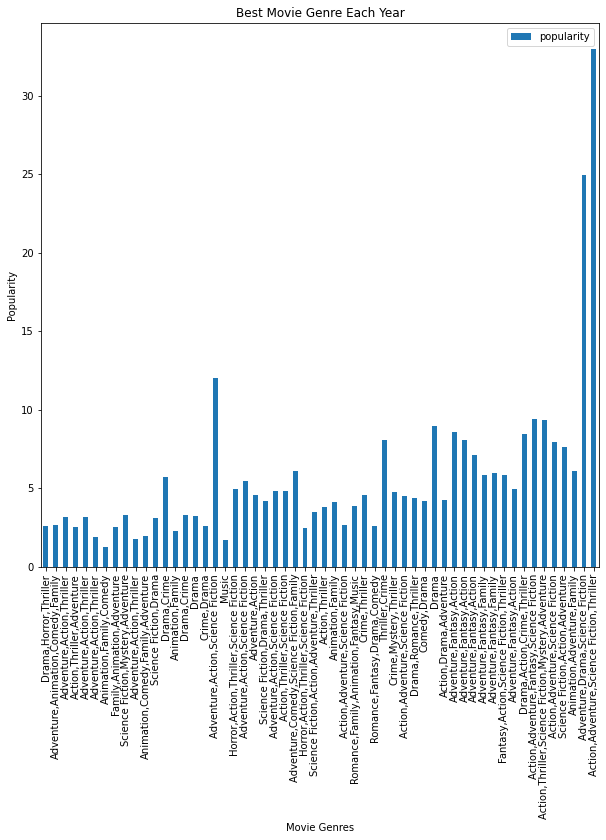

In [395]:
df_popular_genree.plot(x='genree',y='popularity',xlabel='Movie Genres',ylabel='Popularity',title='Best Movie Genre Each Year',kind='bar',figsize=(10,10));

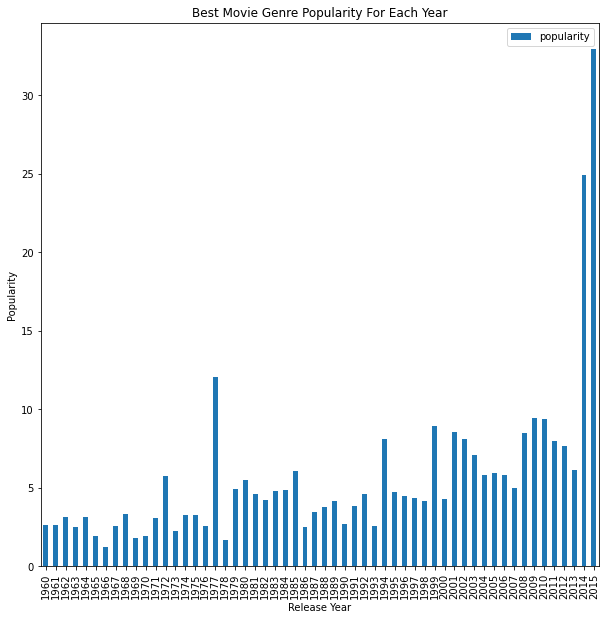

In [396]:
df_popular_genree.plot(x='release_year',y='popularity',xlabel = 'Release Year', ylabel='Popularity',title='Best Movie Genre Popularity For Each Year',kind='bar',figsize=(10,10));

In [397]:
df_popular_genree.to_csv('Poplur_genres.csv')

__As shown in the two figures above the most popular genres each year and it seems like genre[Action,Adventure,Science Fiction,Thriller] in 2015 was the most popular in all time in__

### What kinds of properties are associated with movies that have high revenues?
__Steps for answering this question will require us to use further cleaning of some movies with values of 0 revenues and budget and creating a function which will interact faster with a scatter diagram to show which features are of postive/negative and strong/weak relation with high revenues__


In [398]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9773 entries, 0 to 9772
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9773 non-null   float64       
 1   original_title        9773 non-null   object        
 2   cast                  9773 non-null   object        
 3   director              9773 non-null   object        
 4   runtime               9773 non-null   int64         
 5   genres                9773 non-null   object        
 6   production_companies  9773 non-null   object        
 7   release_date          9773 non-null   datetime64[ns]
 8   vote_count            9773 non-null   int64         
 9   vote_average          9773 non-null   float64       
 10  release_year          9773 non-null   int64         
 11  budget_adj            9773 non-null   float64       
 12  revenue_adj           9773 non-null   float64       
dtypes: datetime64[ns](

In [399]:
df_properties = df_clean[df_clean['revenue_adj'] > 1]#cleaning data further to answer the above question by selecting data with revenues_adj > 0
df_properties

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,120,"Action,Adventure,Science Fiction,Thriller","Village Roadshow Pictures,Kennedy Miller Produ...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",Robert Schwentke,119,"Adventure,Science Fiction,Thriller","Summit Entertainment,Mandeville Films,Red Wago...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",J.J. Abrams,136,"Action,Adventure,Science Fiction,Fantasy","Lucasfilm,Truenorth Productions,Bad Robot",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...",James Wan,137,"Action,Crime,Thriller","Universal Pictures,Original Film,Media Rights ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9731,0.670274,Who's Afraid of Virginia Woolf?,"Elizabeth Taylor,Richard Burton,George Segal,S...",Mike Nichols,131,Drama,Chenault Productions,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08
9737,0.402730,Torn Curtain,"Paul Newman,Julie Andrews,Lila Kedrova,HansjÃ¶...",Alfred Hitchcock,128,"Mystery,Thriller",Universal Pictures,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07
9738,0.395668,El Dorado,"John Wayne,Robert Mitchum,James Caan,Charlene ...",Howard Hawks,120,"Action,Western","Paramount Pictures,Laurel Productions",2066-12-17,36,6.9,1966,3.125892e+07,4.030809e+07
9744,0.299911,The Sand Pebbles,"Steve McQueen,Richard Attenborough,Richard Cre...",Robert Wise,182,"Action,Adventure,Drama,War,Romance","Twentieth Century Fox Film Corporation,Solar P...",2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08


In [400]:
df_properties = df_properties[df_properties['budget_adj'] > 1]#cleaning data further by selecting data with budget > 0

In [401]:
df_properties.info() # checking data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 9756
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3805 non-null   float64       
 1   original_title        3805 non-null   object        
 2   cast                  3805 non-null   object        
 3   director              3805 non-null   object        
 4   runtime               3805 non-null   int64         
 5   genres                3805 non-null   object        
 6   production_companies  3805 non-null   object        
 7   release_date          3805 non-null   datetime64[ns]
 8   vote_count            3805 non-null   int64         
 9   vote_average          3805 non-null   float64       
 10  release_year          3805 non-null   int64         
 11  budget_adj            3805 non-null   float64       
 12  revenue_adj           3805 non-null   float64       
dtypes: datetime64[ns](

In [402]:
df_properties.reset_index(inplace=True,drop=True)

In [403]:
df_properties[df_properties['revenue_adj'] == 0],df_properties[df_properties['budget_adj']==0] #checking data

(Empty DataFrame
 Columns: [popularity, original_title, cast, director, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
 Index: [],
 Empty DataFrame
 Columns: [popularity, original_title, cast, director, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
 Index: [])

In [404]:
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3805 non-null   float64       
 1   original_title        3805 non-null   object        
 2   cast                  3805 non-null   object        
 3   director              3805 non-null   object        
 4   runtime               3805 non-null   int64         
 5   genres                3805 non-null   object        
 6   production_companies  3805 non-null   object        
 7   release_date          3805 non-null   datetime64[ns]
 8   vote_count            3805 non-null   int64         
 9   vote_average          3805 non-null   float64       
 10  release_year          3805 non-null   int64         
 11  budget_adj            3805 non-null   float64       
 12  revenue_adj           3805 non-null   float64       
dtypes: datetime64[ns](

In [405]:
df_properties.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,1.203804,109.351643,534.173456,6.170486,2001.228909,4.472765e+07,1.387162e+08
std,1.480560,19.845191,883.750199,0.792538,11.329400,4.488175e+07,2.169971e+08
min,0.010335,15.000000,10.000000,2.200000,1960.000000,1.309053e+00,2.370705e+00
25%,0.470651,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,0.810805,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,1.387163,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Investigating Outliners in the data by using Histograms and Boxplots

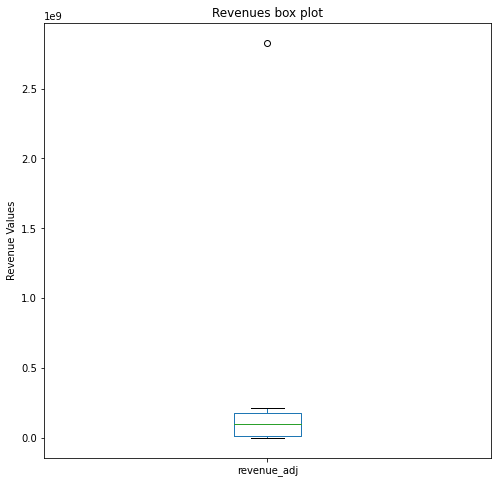

In [488]:
df_properties.describe().revenue_adj.plot(kind='box',figsize=(8,8),title='Revenues box plot',ylabel='Revenue Values');

In [407]:
df_properties[df_properties['revenue_adj'] >= 2827123750.41189] # revenue outliner

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
344,9.432768,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,162,"Action,Adventure,Fantasy,Science Fiction","Ingenious Film Partners,Twentieth Century Fox ...",2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


In [408]:
duplicates= df_properties[df_properties['popularity'].duplicated(keep = False)] # detecting duplicates (double checking)
duplicates

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
580,1.107689,From Paris with Love,"John Travolta,Jonathan Rhys Meyers,Kasia Smutn...",Pierre Morel,92,"Action,Crime,Thriller","ApipoulaÃ¯,M6 Films,Canal+,TPS Star,Grive Prod...",2010-02-05,432,6.1,2010,5.200000e+07,5.261581e+07
642,0.596430,TEKKEN,"Jon Foo,Kelly Overton,Cary-Hiroyuki Tagawa,Ian...",Dwight H. Little,92,"Crime,Drama,Action,Thriller,Science Fiction","Namco,Light Song Films",2010-03-20,110,5.0,2010,3.000000e+07,9.670000e+05
643,0.596430,TEKKEN,"Jon Foo,Kelly Overton,Cary-Hiroyuki Tagawa,Ian...",Dwight H. Little,92,"Crime,Drama,Action,Thriller,Science Fiction","Namco,Light Song Films",2010-03-20,110,5.0,2010,3.000000e+07,9.670000e+05
800,0.187319,Dick,"Kirsten Dunst,Michelle Williams,Will Ferrell,D...",Andrew Fleming,94,Comedy,Columbia Pictures,1999-08-04,33,5.7,1999,1.701769e+07,3.599895e+07
1160,1.107689,The Darkest Hour,"Emile Hirsch,Rachael Taylor,Olivia Thirlby,Joe...",Chris Gorak,89,"Horror,Action,Thriller,Science Fiction","Summit Entertainment,Regency Enterprises,Bazel...",2011-12-25,309,4.7,2011,2.908194e+07,6.264908e+07
2374,0.187319,Ten Canoes,"Crusoe Kurddal,Jamie Gulpilil,Richard Birrinbi...",Rolf de Heer|Peter Djigirr,90,"Adventure,Comedy,Drama","Fandango,Vertigo Productions,SBS Independent,A...",2006-06-29,12,5.9,2006,2.163338e+06,3.245007e+05


__It apears to be a duplicate row in the above table with indexs of (642,643)__

In [409]:
df_properties.drop(643,inplace=True)
df_properties.reset_index(drop=True,inplace=True)


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [410]:
duplicates= df_properties[df_properties['popularity'].duplicated(keep = False)] # detecting duplicates (double checking)
duplicates

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
580,1.107689,From Paris with Love,"John Travolta,Jonathan Rhys Meyers,Kasia Smutn...",Pierre Morel,92,"Action,Crime,Thriller","ApipoulaÃ¯,M6 Films,Canal+,TPS Star,Grive Prod...",2010-02-05,432,6.1,2010,5.200000e+07,5.261581e+07
799,0.187319,Dick,"Kirsten Dunst,Michelle Williams,Will Ferrell,D...",Andrew Fleming,94,Comedy,Columbia Pictures,1999-08-04,33,5.7,1999,1.701769e+07,3.599895e+07
1159,1.107689,The Darkest Hour,"Emile Hirsch,Rachael Taylor,Olivia Thirlby,Joe...",Chris Gorak,89,"Horror,Action,Thriller,Science Fiction","Summit Entertainment,Regency Enterprises,Bazel...",2011-12-25,309,4.7,2011,2.908194e+07,6.264908e+07
2373,0.187319,Ten Canoes,"Crusoe Kurddal,Jamie Gulpilil,Richard Birrinbi...",Rolf de Heer|Peter Djigirr,90,"Adventure,Comedy,Drama","Fandango,Vertigo Productions,SBS Independent,A...",2006-06-29,12,5.9,2006,2.163338e+06,3.245007e+05


### Function Creation section

In [535]:
def com_cat_vcounts(df,figure,data):# made this function to deal with catagorical data of object data type and to avoid reptitive use of functions
    types = ['bar','box','hist']
    if df[data].dtype != object:# check if the column is of object dtype
        return print ("Please enter a column of object dtype.")
    elif figure  not in types:
        return print('Pease enter correct (figure) value in function com_cat_vcounts(dataframe,figure,data) as in figure = [bar,hist,box]')
    elif data not in df.columns:
        return print('Please enter the correct column name as in',df.columns)
    else:
        if figure == 'hist':
            figure = 'bar'
            return df[data].value_counts().plot(kind=figure,figsize=(8,8),legend = True ,xlabel = data.title() ,ylabel = 'Value Count' ,title = 'Value Count for each {} '.format(data));
        else:
            return df[data].value_counts().plot(kind=figure,figsize=(8,8),legend = True ,xlabel = data.title() ,ylabel = 'Value Count' ,title = 'Value Count for each {} '.format(data));
    
    
    

In [539]:
def df_scatter(x,y,df): # creating a function to make it easier for me to do it as many times as i want and remove redundency
    try:
        x = x.lower()
        y = y.lower()
        i = plt.scatter(df[x],df[y],label='Plot');
        z = plt.title('Relation Between {} and {}'.format(x,y));
        p = plt.xlabel(x.title());
        f = plt.ylabel(y.title());
        u = plt.legend(loc='upper right')
        return i,z,f,p,u
    except:
        return print('error you just entered a non existing column or columns')

    

In [496]:
def df_pi(x,y,title,name1,name2): # creating a function to make it easier for me to do it as many times as i want and remove redundency
    df = pd.DataFrame({" ":[x,y]},index=[name1,name2])
    return df.plot.pie(y=' ',title=title,figsize=(10,10),autopct='%1.1f%%')
    
    
    
    
    
    
    
    

### Investigating most popular cast (Movie Stars) which may have participated in increase of high revenues as much as data was collected in file tmdb-movies.csv

In [497]:
df_cast=df_properties[df_properties['cast'].duplicated(keep=False)]# probably the cast which toke place more than once are a reason popularity of movie and  for high revenues
df_cast.reset_index(drop=True, inplace = True)
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            36 non-null     float64       
 1   original_title        36 non-null     object        
 2   cast                  36 non-null     object        
 3   director              36 non-null     object        
 4   runtime               36 non-null     int64         
 5   genres                36 non-null     object        
 6   production_companies  36 non-null     object        
 7   release_date          36 non-null     datetime64[ns]
 8   vote_count            36 non-null     int64         
 9   vote_average          36 non-null     float64       
 10  release_year          36 non-null     int64         
 11  budget_adj            36 non-null     float64       
 12  revenue_adj           36 non-null     float64       
dtypes: datetime64[ns](1), 

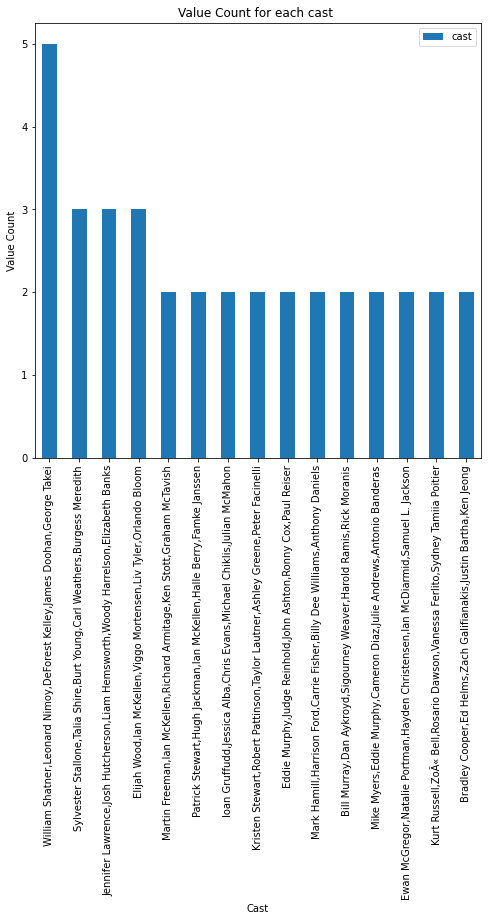

In [534]:
com_cat_vcounts(df_cast,'bar','cast');#investigating data more to relate fame of cast which may have participated in increase of revenues.

- By looking at the figure above you will find names of famous movie stars such as William Shatner,Sylvester Stallone,Orlando Bloom, Liam Hemsworth and Jennifer Lawrence etc...

- It is indicated in the above figure that highly talented and famous actors may have contributed to high revenues to movies

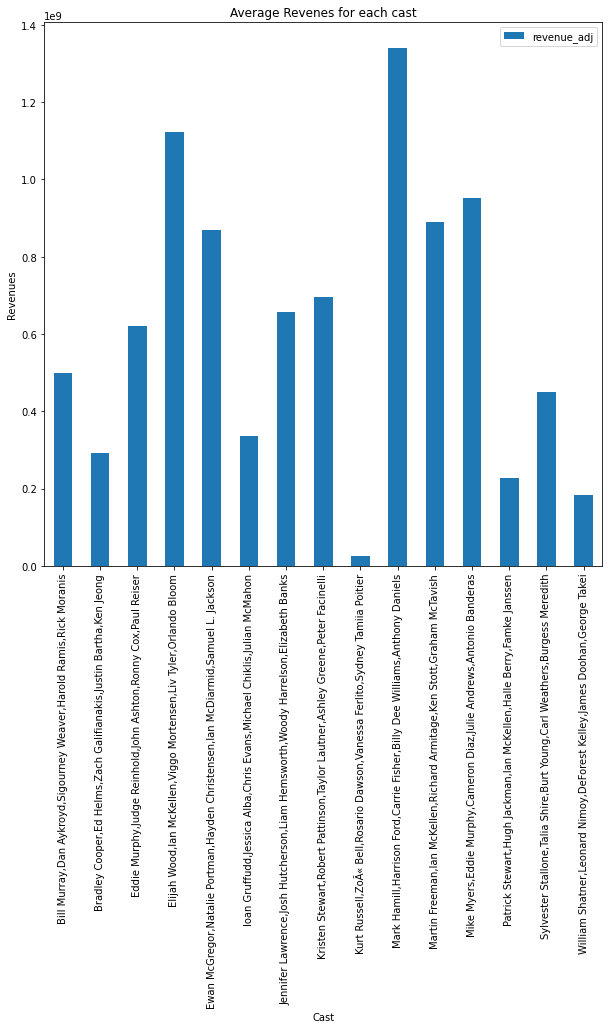

In [499]:
df_cast.groupby('cast').median()['revenue_adj'].plot(kind='bar',legend = True,title='Average Revenes for each cast',xlabel='Cast',ylabel='Revenues',figsize=(10,10));

- by investigating both of the above figures it was indicated that repeatence of actors in movies may have a weak relation with high revenues, How ever actor's popularity which is not in the dataframe provided may have strong relation with high revenue movies
- for example in first figure (Value Counts for each cast) is a meter for how many times the cast performed, by looking at the figure u find that cast includes William Shanter performed 5 times and in second figure (Average Revenes for each cast),we find that cast includes William Shanter is the second minimum revenues in the list.

In [500]:
more_revenues=df_cast['revenue_adj'].sum()
more_budget = df_cast['budget_adj'].sum()

In [501]:
df_once=df_properties[~df_properties['cast'].duplicated(keep=False)]#dataframe for cast for which performed once
df_once.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3768 entries, 0 to 3803
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3768 non-null   float64       
 1   original_title        3768 non-null   object        
 2   cast                  3768 non-null   object        
 3   director              3768 non-null   object        
 4   runtime               3768 non-null   int64         
 5   genres                3768 non-null   object        
 6   production_companies  3768 non-null   object        
 7   release_date          3768 non-null   datetime64[ns]
 8   vote_count            3768 non-null   int64         
 9   vote_average          3768 non-null   float64       
 10  release_year          3768 non-null   int64         
 11  budget_adj            3768 non-null   float64       
 12  revenue_adj           3768 non-null   float64       
dtypes: datetime64[ns](

In [502]:
once_revenues = df_once['revenue_adj'].sum()
once_budget = df_once ['budget_adj'].sum()

In [503]:
df_cast_vcounts = pd.DataFrame({" ":[sum(df_cast.value_counts()),sum(df_once.value_counts())]},index=['Cast performed more than once','Cast performed once'])#counts of cast perfomored more than once and once for pie chart data visilization.

In [504]:
#plot = df.plot.pie(y='hours', title="Title", legend=False, \
                   #autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   #shadow=True, startangle=0)
#Really need this above code to be written like this.
df_cast_budget = pd.DataFrame({" ":[more_budget,once_budget]},index=['Cast performed more than once','Cast performed once'])
df_cast_budget

,
Cast performed more than once,3.246955e+09
Cast performed once,1.669118e+11


In [505]:
df_cast_revenues = pd.DataFrame({" ":[more_revenues,once_revenues]},index=['Cast performed more than once','Cast performed once'])
df_cast_revenues

,
Cast performed more than once,2.133199e+10
Cast performed once,5.064821e+11


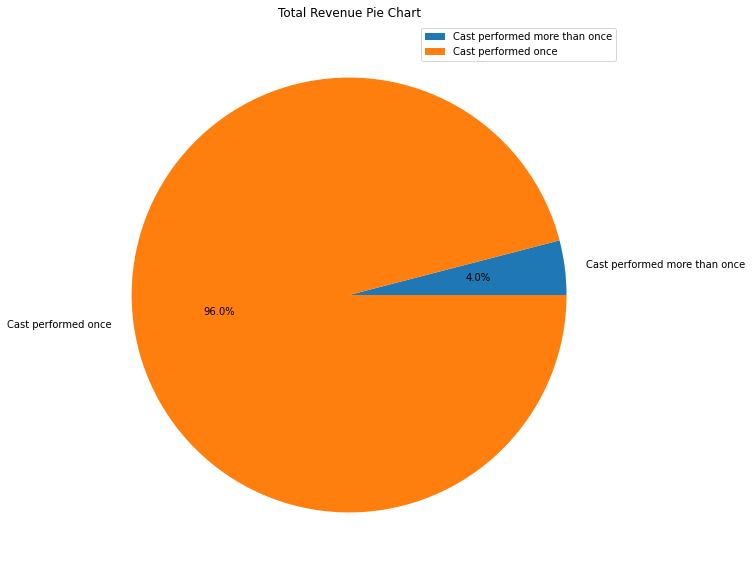

In [506]:
df_cast_revenues.plot.pie(y=' ',title="Total Revenue Pie Chart",figsize=(10,10),autopct='%1.1f%%');

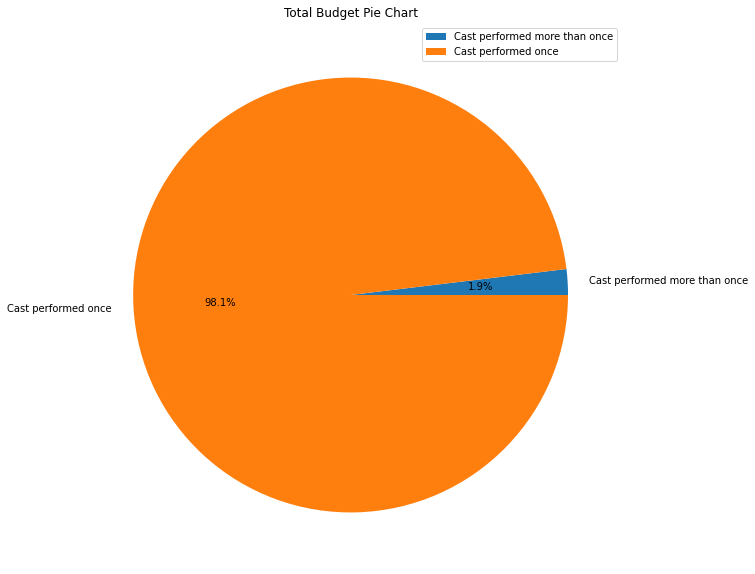

In [507]:
df_cast_budget.plot.pie(y=' ',title="Total Budget Pie Chart",figsize=(10,10),autopct='%1.1f%%');

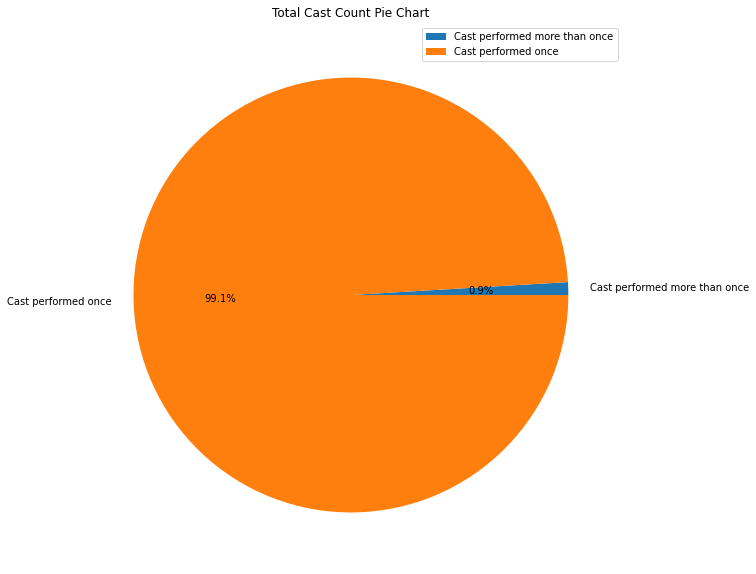

In [508]:
df_cast_vcounts.plot.pie(y=' ',title="Total Cast Count Pie Chart",figsize=(10,10),autopct='%1.1f%%');

- From figures above we can see that percentage of __cast peformed more than once__ is 0.9%, spent about 1.9% of __total budget__ spent for movies and achieved __revenues__ of 4.0% of the total revenues of all movies.
- We can deduce that movie actors fame may have contributed to high movie revenues.

### Investigating most well known production companys which may have participated in increase of high revenues as much as data was collected in file tmdb-movies.csv

In [509]:
sum(df_properties['production_companies'].duplicated(keep=False))

990

In [510]:
df_companies= df_properties[df_properties['production_companies'].duplicated(keep = False)]#extracting production companies that may have produced more than one movie in the data list
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 6 to 3803
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            990 non-null    float64       
 1   original_title        990 non-null    object        
 2   cast                  990 non-null    object        
 3   director              990 non-null    object        
 4   runtime               990 non-null    int64         
 5   genres                990 non-null    object        
 6   production_companies  990 non-null    object        
 7   release_date          990 non-null    datetime64[ns]
 8   vote_count            990 non-null    int64         
 9   vote_average          990 non-null    float64       
 10  release_year          990 non-null    int64         
 11  budget_adj            990 non-null    float64       
 12  revenue_adj           990 non-null    float64       
dtypes: datetime64[ns](1

In [511]:
df_company =df_properties[~df_properties['production_companies'].duplicated(keep = False)]#extracting production company produced only one movie
df_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2814 entries, 0 to 3802
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            2814 non-null   float64       
 1   original_title        2814 non-null   object        
 2   cast                  2814 non-null   object        
 3   director              2814 non-null   object        
 4   runtime               2814 non-null   int64         
 5   genres                2814 non-null   object        
 6   production_companies  2814 non-null   object        
 7   release_date          2814 non-null   datetime64[ns]
 8   vote_count            2814 non-null   int64         
 9   vote_average          2814 non-null   float64       
 10  release_year          2814 non-null   int64         
 11  budget_adj            2814 non-null   float64       
 12  revenue_adj           2814 non-null   float64       
dtypes: datetime64[ns](

In [512]:
#Reset index of rows in both dataframes.
df_companies.reset_index(drop=True, inplace = True)
df_company.reset_index(drop=True, inplace = True)

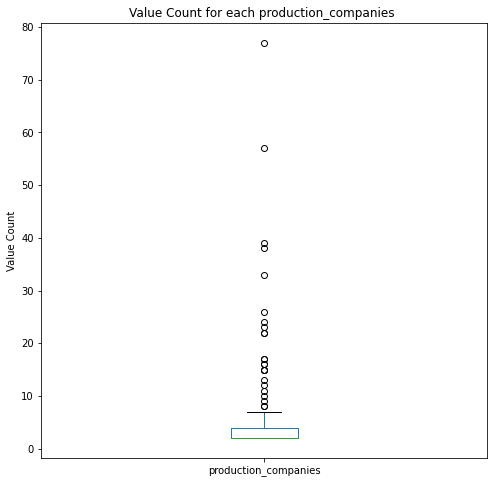

In [513]:
#using box plot would be much effective in large dataframes 
com_cat_vcounts(df_companies,'box','production_companies');

- It is indicated that there are many outliners in this dataframe meaning that there are many competitive companies

In [514]:
sum(df_companies['popularity'].duplicated())#Double Checking for duplicates

0

In [515]:
df_companies.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,990.000000,990.000000,990.000000,990.000000,990.000000,9.900000e+02,9.900000e+02
mean,1.218216,107.933333,568.619192,6.196061,1996.650505,5.094517e+07,1.982772e+08
std,1.364701,19.483409,1003.469562,0.782205,11.537475,4.701208e+07,2.767123e+08
min,0.015997,26.000000,10.000000,3.500000,1961.000000,4.519285e+00,8.585801e+00
25%,0.463550,94.000000,65.000000,5.700000,1990.000000,1.851542e+07,3.386406e+07
50%,0.796935,104.000000,184.000000,6.200000,1998.000000,3.530156e+07,8.778493e+07
75%,1.444796,118.000000,542.750000,6.800000,2006.000000,6.792537e+07,2.315352e+08
max,12.971027,219.000000,8903.000000,8.400000,2015.000000,3.155006e+08,2.789712e+09


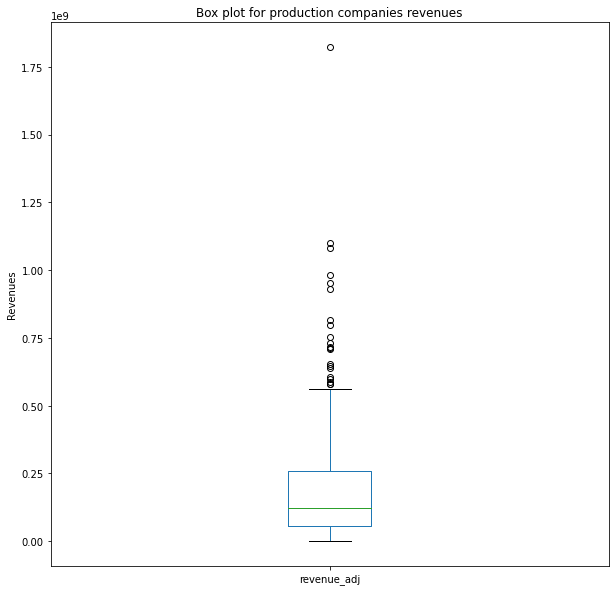

In [516]:
df_companies.groupby('production_companies').mean()['revenue_adj'].plot(kind='box',figsize=(10,10) ,xlabel='Production Companies',ylabel='Revenues',title='Box plot for production companies revenues');

In [517]:
company_revenue = sum(df_company['revenue_adj'])
company_budget = sum(df_company['budget_adj'])
company_count = sum(df_company.value_counts())
company_revenue,company_budget,company_count

(331519739240.88684, 119722983742.84262, 2814)

In [518]:
companies_revenue = sum(df_companies['revenue_adj'])
companies_budget = sum(df_companies['budget_adj'])
companies_count = sum(df_companies.value_counts())
companies_revenue,companies_budget,companies_count

(196294389610.20752, 50435723195.83332, 990)

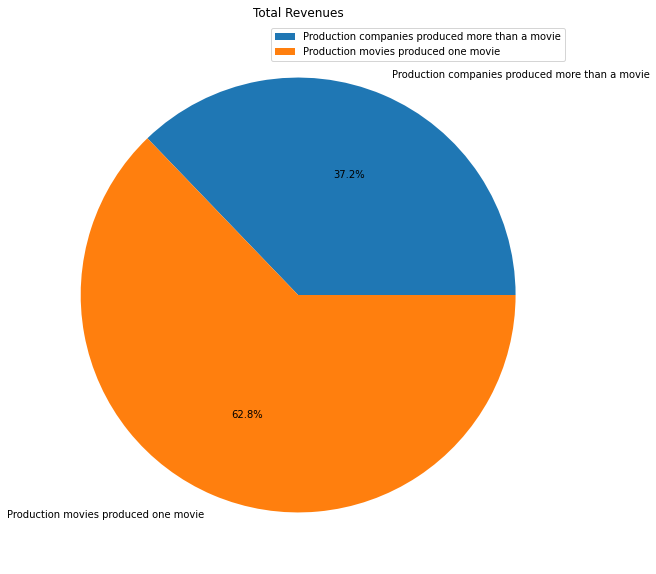

In [519]:
#df_pi(x,y,title,name1,name2)
df_pi(companies_revenue,company_revenue,'Total Revenues','Production companies produced more than a movie','Production movies produced one movie');

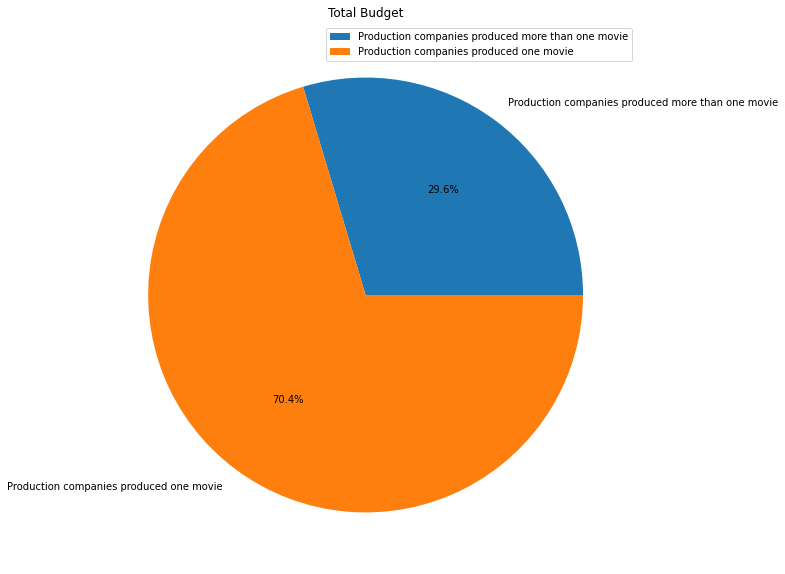

In [520]:
df_pi(companies_budget,company_budget,'Total Budget','Production companies produced more than one movie','Production companies produced one movie');

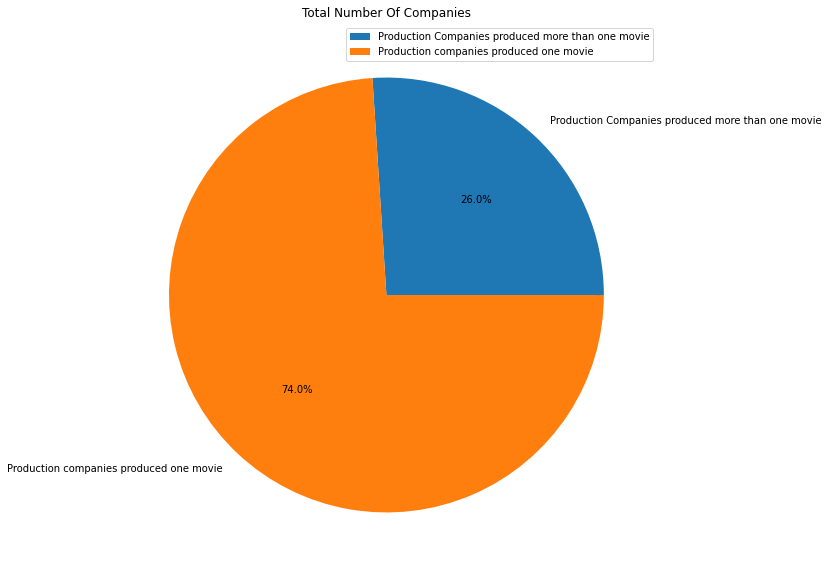

In [521]:
df_pi(companies_count,company_count,"Total Number Of Companies",'Production Companies produced more than one movie','Production companies produced one movie');

- It is indicated in the above figures that production companies produced more than one movie represent 26.0% of total production companies.
- Also the revenues achieved is about 37.2% of total revenues and budget is about 29.6%

In [522]:
df_properties[df_properties['director'].duplicated()]

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
141,0.654046,Manglehorn,"Al Pacino,Chris Messina,Holly Hunter,Harmony K...",David Gordon Green,97,Drama,Worldview Entertainment,2015-06-03,35,5.0,2015,3.679998e+06,1.316529e+05
164,10.739009,The Hunger Games: Mockingjay - Part 1,"Jennifer Lawrence,Josh Hutcherson,Liam Hemswor...",Francis Lawrence,123,"Science Fiction,Adventure,Thriller","Lionsgate,Color Force",2014-11-18,3590,6.6,2014,1.151364e+08,6.927528e+08
168,7.137273,The Maze Runner,"Dylan O'Brien,Ki Hong Lee,Kaya Scodelario,Aml ...",Wes Ball,113,"Action,Mystery,Science Fiction,Thriller","Ingenious Media,Twentieth Century Fox Film Cor...",2014-09-10,3425,7.0,2014,3.131710e+07,3.208343e+08
169,6.907148,Birdman,"Michael Keaton,Zach Galifianakis,Edward Norton...",Alejandro GonzÃ¡lez IÃ±Ã¡rritu,119,"Drama,Comedy","Worldview Entertainment,New Regency Pictures,T...",2014-10-17,2801,7.3,2014,1.657964e+07,9.507050e+07
183,4.145209,The Equalizer,"Denzel Washington,Marton Csokas,ChloÃ« Grace M...",Antoine Fuqua,132,"Thriller,Action,Crime","Columbia Pictures,Village Roadshow Pictures,Es...",2014-09-24,2100,7.2,2014,5.066001e+07,1.771541e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,0.277769,The Wiz,"Diana Ross,Michael Jackson,Nipsey Russell,Ted ...",Sidney Lumet,134,"Adventure,Family,Fantasy,Music,Science Fiction","Universal Pictures,Motown Productions",1978-10-24,30,6.1,1978,8.022482e+07,7.036068e+07
3799,0.670274,Who's Afraid of Virginia Woolf?,"Elizabeth Taylor,Richard Burton,George Segal,S...",Mike Nichols,131,Drama,Chenault Productions,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08
3800,0.402730,Torn Curtain,"Paul Newman,Julie Andrews,Lila Kedrova,HansjÃ¶...",Alfred Hitchcock,128,"Mystery,Thriller",Universal Pictures,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07
3802,0.299911,The Sand Pebbles,"Steve McQueen,Richard Attenborough,Richard Cre...",Robert Wise,182,"Action,Adventure,Drama,War,Romance","Twentieth Century Fox Film Corporation,Solar P...",2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08


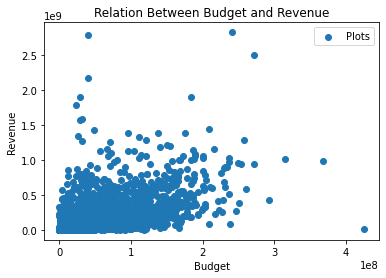

In [529]:
plt.scatter(df_properties.budget_adj,df_properties.revenue_adj,label= 'Plots')
plt.title('Relation Between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue');
plt.legend(loc='upper right');


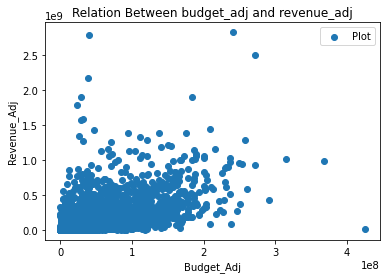

In [540]:
df_scatter('budget_adj','revenue_adj',df_properties);

In this diagram as indicated there is a strong positive relation between budget and revenues

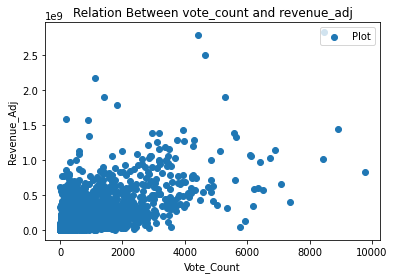

In [548]:
df_scatter('vote_count','revenue_adj',df_properties);

In this diagram it apears that vote_counts is of strong postive relation with high revenues

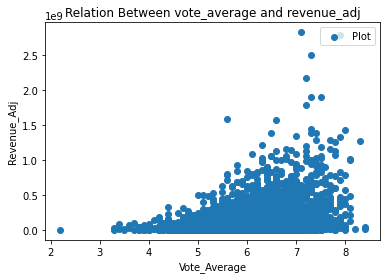

In [549]:
df_scatter('vote_average','revenue_adj',df_properties);

In this diagram it apears that vote_average is of strong postive relation with high revenues

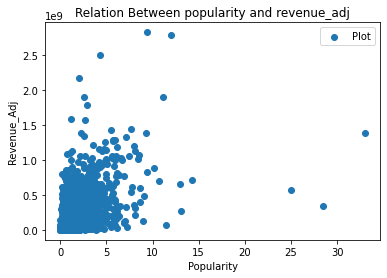

In [550]:
df_scatter('popularity','revenue_adj',df_properties);

In this diagram it apears that popularity is of strong postive relation with high revenues

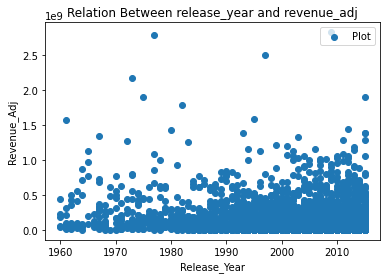

In [551]:
df_scatter('release_year','revenue_adj',df_properties);

In this diagram it apears that release_year is of weak postive relation with high revenues

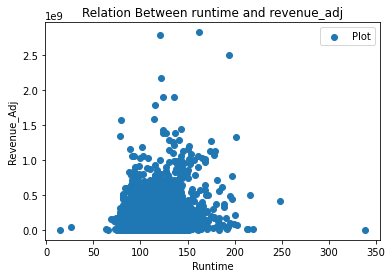

In [552]:
df_scatter('runtime','revenue_adj',df_properties);

In this diagram it apears that runtime  is of strong postive relation with high revenues

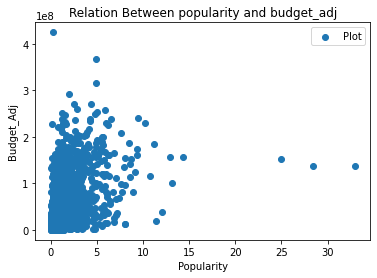

In [553]:
df_scatter('popularity','budget_adj',df_properties);

In this above diagram it is shown that there is a positive strong relation between popularity and budget which would explain 
a marketing for the movie befor it's release would eventualy lead to higher revenues

## Conclusions

- It is have indicated in the above figures that the genres of movies that were popular each year may have contributed to achieve high revenues 
- Also it apears that high revenues may have occured due to movie cast(Movie Stars) it would be more accurate if dataset did include fame rate for cast which would have produced a more accurate conclusion.
- statisticaly above figures may indicate that popularity,budget and release year of the movie may have postive relation with contribution of high revenues
- As it is concluded for budget it means paying good money for recieving both highly skills and quality work and for popularity that would probably refer to marketing of the movie befor it's release or during it's release which would increase the revenues as well as for it's run time which is the duration of the movie
### Limitations
- The dataframe missing alot of data from revenues and budget of movies from years befor 2000
- There is not rating or popularity for the movie cast (movie star actors) which could have helped in investigating data even more accuratly.


In [487]:
df_properties.to_csv('movie_properties.csv')